In [1]:
import pandas as pd
import os
from enum import Enum
from typing import List

class MovieDataLoader:
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.extension = os.path.splitext(file_path)[1]
        self.dataframe = None

    def load(self) -> pd.DataFrame:
        self.dataframe = pd.read_csv(
            self.file_path,
            sep='\t' if self.extension == '.txt' else ','
        )
        return self.dataframe

class DB(Enum):
    CASTINGS = 0
    COUNTRIES = 1
    GENRES = 2
    RATES = 3
    MOVIES = 4
    PEOPLES = 5

def get_dataframes() -> List[pd.DataFrame]:
    base_path = os.path.join(
        os.getcwd(),
        "data/kmrd/kmr_dataset/datafile/kmrd-small"
    )
    db_name = ["castings.csv", "countries.csv", "genres.csv", "rates.csv", "movies.txt", "peoples.txt"]
    db_paths = [os.path.join(base_path, name) for name in db_name]
    return [MovieDataLoader(path).load() for path in db_paths]

In [2]:
dataframes = get_dataframes()
castings_df = dataframes[DB.CASTINGS.value]
countries_df = dataframes[DB.COUNTRIES.value]
genres_df = dataframes[DB.GENRES.value]
rates_df = dataframes[DB.RATES.value]
movies_df = dataframes[DB.MOVIES.value]
peoples_df = dataframes[DB.PEOPLES.value]

print(castings_df.head())
print(countries_df.head())
print(genres_df.head())

   movie  people  order  leading
0  10001    4374      1        1
1  10001     178      2        1
2  10001    3241      3        1
3  10001   47952      4        1
4  10001   47953      5        0
   movie country
0  10001    이탈리아
1  10001     프랑스
2  10002      미국
3  10003      미국
4  10004      미국
   movie   genre
0  10001     드라마
1  10001  멜로/로맨스
2  10002      SF
3  10002     코미디
4  10003      SF
   user  movie  rate        time
0     0  10003     7  1494128040
1     0  10004     7  1467529800
2     0  10018     9  1513344120
3     0  10021     9  1424497980
4     0  10022     7  1427627340
   movie                 title                           title_eng    year  \
0  10001                시네마 천국              Cinema Paradiso , 1988  2013.0   
1  10002              빽 투 더 퓨쳐           Back To The Future , 1985  2015.0   
2  10003            빽 투 더 퓨쳐 2    Back To The Future Part 2 , 1989  2015.0   
3  10004            빽 투 더 퓨쳐 3  Back To The Future Part III , 1990  1990.0   
4  10005  

In [ ]:
print(rates_df.head())
print(movies_df.head())
print(peoples_df.head())

In [3]:
# 결측치 확인
def print_missing_values():
    print("결측치 확인:")
    print(movies_df.isnull().sum())
    print(castings_df.isnull().sum())
    print(countries_df.isnull().sum())
    print(genres_df.isnull().sum())
    print(rates_df.isnull().sum())

def remove_missing_values():
    movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')
    movies_df['grade'] = pd.to_numeric(movies_df['grade'], errors='coerce')

    year_median = movies_df['year'].median() if not movies_df['year'].isna().all() else 0
    grade_median = movies_df['grade'].median() if not movies_df['grade'].isna().all() else 0

    # Fill missing values
    movies_df.fillna({
        'title': 'Unknown',
        'title_eng': 'Unknown',
        'year': year_median,
        'grade': grade_median
    }, inplace=True)

    peoples_df.fillna({
        'original': 'Unknown'
    }, inplace=True)

print_missing_values()

결측치 확인:
movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [4]:
remove_missing_values()
print_missing_values()

결측치 확인:
movie        0
title        0
title_eng    0
year         0
grade        0
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# D2Coding 폰트 경로 설정
font_path = "../D2Coding.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc("font", family=fontprop.get_name())
plt.rcParams.update({"font.size": 14})  # Set the font size to 14
plt.figure(figsize=(16, 9))


<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

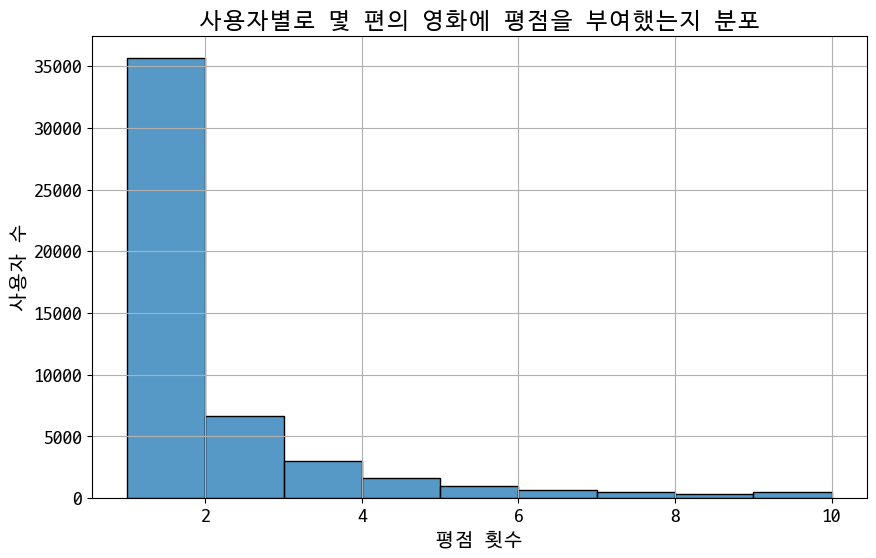

In [6]:
# 사용자별로 몇 편의 영화에 평점을 부여했는지 분포를 확인

# rates_df의 user 컬럼을 기준으로 groupby를 수행하고, movie 컬럼을 기준으로 count를 수행합니다.
user_rates = rates_df.groupby('user')['movie'].count()
user_rates = user_rates.reset_index()
user_rates.columns = ['user', 'rate_count']

# 히스토그램을 그립니다.
plt.figure(figsize=(10, 6))
sns.histplot(data=user_rates, x='rate_count', bins=range(1, 11), kde=False)
plt.title("사용자별로 몇 편의 영화에 평점을 부여했는지 분포")
plt.xlabel("평점 횟수")
plt.ylabel("사용자 수")
plt.grid()
plt.show()


    user  movie  rate        time
48     0  10330    10  1388915880
13     0  10048     7  1394114760
64     0  10546    10  1394354220
33     0  10132     9  1403325360
38     0  10201     8  1411203480
..   ...    ...   ...         ...
60     0  10494     6  1504613460
67     0  10592     6  1505982840
2      0  10018     9  1513344120
9      0  10029     9  1513602720
78     0  10874     7  1515239220

[85 rows x 4 columns]


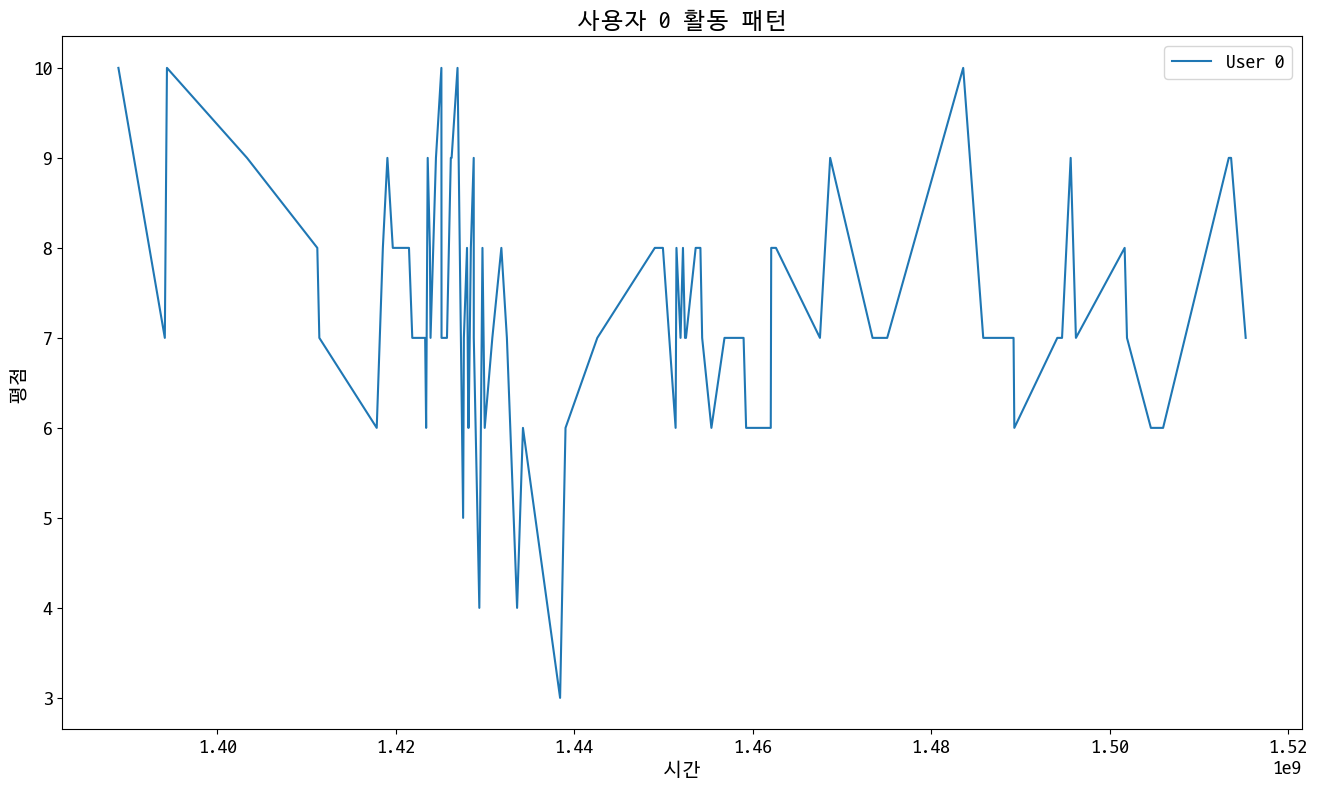

In [7]:
# rates_df['time'] = pd.to_datetime(rates_df['time'], unit='s')  # 이미 datetime으로 변환되어 있음

# 특정 사용자 활동 패턴 (예: 사용자 ID가 0인 경우)
user_id = 0
user_data = rates_df[rates_df['user'] == user_id].sort_values(by='time')
print(user_data)

plt.figure(figsize=(16, 9))
plt.plot(user_data['time'], user_data['rate'], label=f'User {user_id}')
plt.xlabel('시간')
plt.ylabel('평점')
plt.title(f'사용자 {user_id} 활동 패턴')
plt.legend()
plt.show()

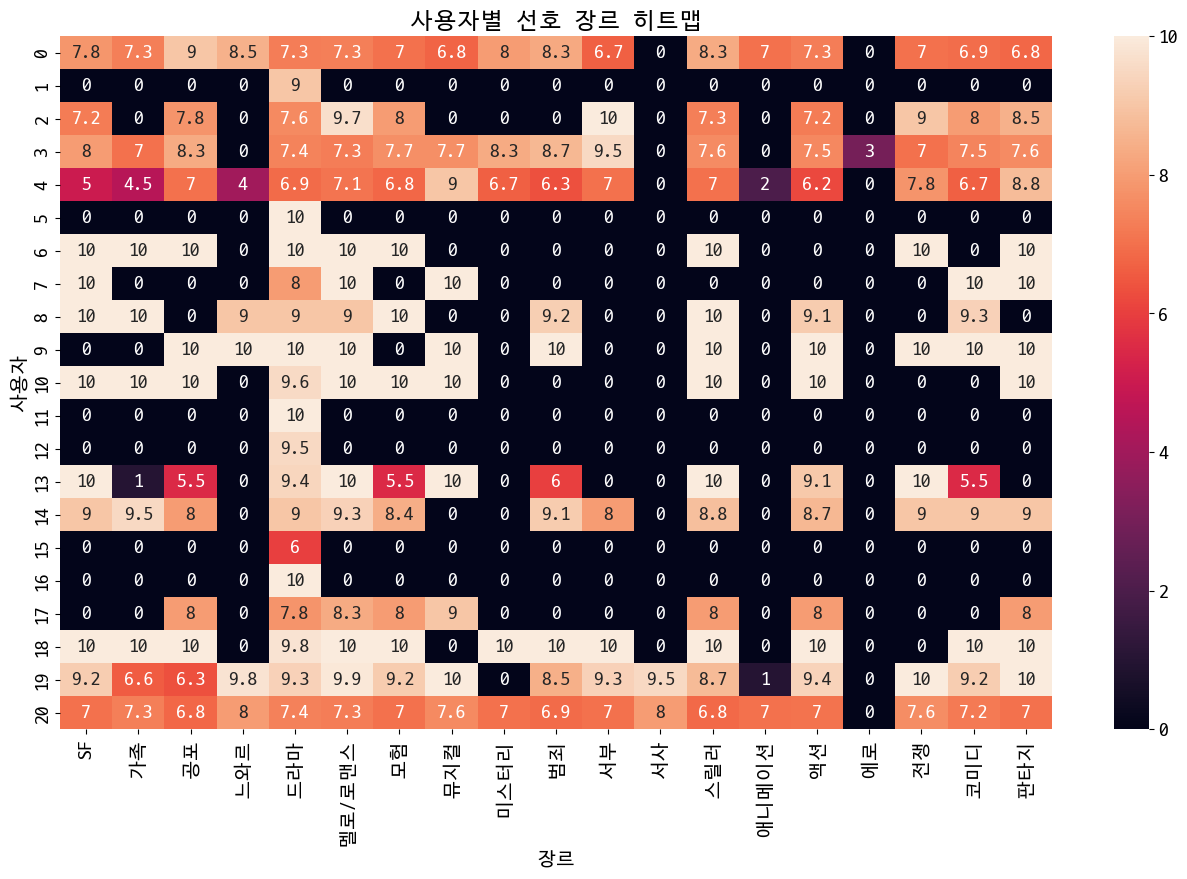

In [40]:
# 유저 ID가 0부터 20까지의 데이터만 필터링
filtered_rates_df = rates_df[rates_df['user'].between(0, 20)]

# rates_df와 genres_df 병합
merged_df = pd.merge(filtered_rates_df, genres_df, on='movie')

# 사용자별 장르 선호도 계산
user_genre_pref = merged_df.pivot_table(index='user', columns='genre', values='rate', aggfunc='mean').fillna(0)

# 히트맵
plt.figure(figsize=(16, 9))
sns.heatmap(user_genre_pref, annot=True)
plt.xlabel('장르')
plt.ylabel('사용자')
plt.title('사용자별 선호 장르 히트맵')
plt.show()